## ***import library***

In [140]:
import os
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import TruncatedSVD

from collections import Counter
from nltk.corpus import stopwords
from gensim.models.phrases import Phrases, Phraser
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary data
nltk.download('punkt', force=True)
nltk.download('wordnet', force=True)
nltk.download('stopwords', force=True)
# import warnings
# warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["course", "learn", "project",'and', 'or', 'the', 'a', 'is', 'in', 'to'])

In [ ]:
df = pd.read_csv('coursera_processed_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3424 non-null   object 
 1   University          3424 non-null   object 
 2   Difficulty Level    3424 non-null   object 
 3   Course Rating       3424 non-null   float64
 4   Course URL          3424 non-null   object 
 5   Course Description  3424 non-null   object 
 6   Skills              3424 non-null   object 
 7   ID                  3424 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 214.1+ KB


In [ ]:
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), ngram_range=(1, 3))
tfidf_matrix = vectorizer.fit_transform(df['Skills'])

In [ ]:
from sklearn.cluster import KMeans

In [71]:
inertia = []
for k in range(4, 26):
    num_clusters = 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    kmeans.inertia_
    inertia.append(kmeans.inertia_)
    # print(df)

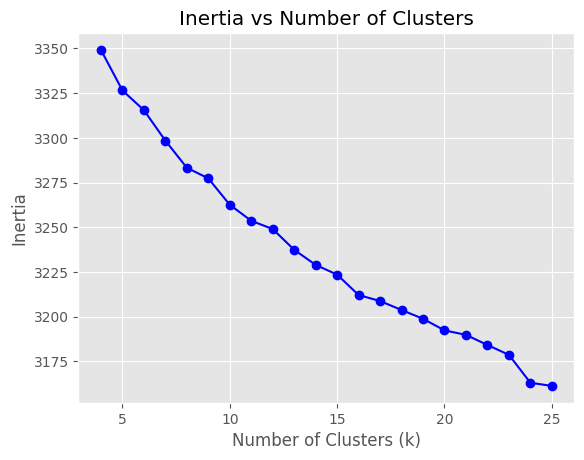

In [72]:
plt.plot(range(4, 26), inertia, marker='o', linestyle='-', color='b')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [79]:
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

df['Cluster'] = kmeans.labels_
# print(df)

In [86]:
df['Cluster'].value_counts()

,count
Cluster,
7,494
10,471
5,343
0,282
9,252
13,231
12,223
4,221
11,219


In [88]:
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def find_most_common_phrase_per_cluster(df, cluster_column_name, column_name, custom_stopwords=[]):
    '''
    @param df: DataFrame containing the data.
    @param cluster_column_name: The column representing the cluster IDs.
    @param column_name: The column whose values are used to extract words (e.g., "Course Description").
    @param custom_stopwords: A list of stopwords to ignore.
    @return: A dictionary mapping each cluster ID to the most common word or phrase in that cluster.
    '''
    cluster_names = {}
    for cluster_id in df[cluster_column_name].unique():
        cluster_text = " ".join(df[df[cluster_column_name] == cluster_id][column_name])

        vectorizer = CountVectorizer(
            stop_words=list(custom_stopwords),
            ngram_range=(1, 3)
        )
        tokenized_phrases = vectorizer.fit_transform([cluster_text])
        terms = vectorizer.get_feature_names_out()
        term_counts = Counter(dict(zip(terms, tokenized_phrases.toarray().flatten())))
        most_common_term = term_counts.most_common(5)
        cluster_names[cluster_id] = most_common_term

    return cluster_names



In [82]:
find_most_common_phrase_per_cluster(df, 'Cluster', 'Skills', custom_stopwords)

{1: [('arts', 222),
  ('history', 220),
  ('arts humanities', 215),
  ('humanities', 215),
  ('art', 205)],
 10: [('business', 810),
  ('finance', 317),
  ('management', 298),
  ('strategy', 286),
  ('business business', 224)],
 2: [('engineering', 228),
  ('electrical', 123),
  ('electrical engineering', 120),
  ('engineering electrical', 83),
  ('engineering electrical engineering', 83)],
 9: [('security', 342),
  ('cloud', 301),
  ('computing', 205),
  ('information', 196),
  ('computer', 188)],
 7: [('computer', 792),
  ('development', 584),
  ('software', 535),
  ('science', 519),
  ('computer science', 510)],
 0: [('management', 577),
  ('leadership', 433),
  ('leadership management', 312),
  ('business', 264),
  ('development', 208)],
 12: [('data', 719),
  ('analysis', 502),
  ('data analysis', 329),
  ('science', 237),
  ('data science', 224)],
 5: [('health', 382),
  ('life', 345),
  ('sciences', 344),
  ('life sciences', 340),
  ('public', 169)],
 13: [('learning', 556),
  (

In [84]:
# here i use chat gpt to write suggestion for each cluster
cluster_titles = {
    1: "Arts and Humanities",
    10: "Business and Finance",
    2: "Electrical Engineering",
    9: "Cybersecurity and Cloud Computing",
    7: "Computer Science and Software Development",
    0: "Leadership and Management",
    12: "Data Science and Analysis",
    5: "Health and Life Sciences",
    13: "Machine Learning and AI",
    11: "Social Sciences and Education",
    6: "Language and Writing",
    8: "Law and Social Studies",
    4: "Physical Sciences and Engineering",
    14: "Statistics and Probability",
    3: "Marketing and Business Strategy"
}

df['Cluster Title'] = df['Cluster'].map(cluster_titles)


In [85]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,ID,Cluster,Cluster Title
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write Full Length Feature Film Script In cours...,"['Drama', 'Comedy', 'peering', 'screenwriting'...",1,1,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By end guided project, fluent identifying crea...","['Finance', 'business', 'plan', 'persona', '(u...",2,10,Business and Finance
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists general presentation sola...,"['chemistry', 'physics', 'Solar', 'Energy', 'f...",3,2,Electrical Engineering
3,Finance Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When comes numbers, meets eye. In operational ...","['accounts', 'receivable', 'dupont', 'analysis...",4,10,Business and Finance
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In course youll learn effectively retrieve dat...,"['Data', 'Analysis', 'select', '(sql)', 'datab...",5,9,Cybersecurity and Cloud Computing


In [125]:
vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords), ngram_range=(1, 3))
vectorizer.fit(df['Skills'] + ' ' + df['Course Name'] + ' ' + df['Course Description'])

TfidfVectorizer(ngram_range=(1, 3),
                stop_words=['were', 'again', 'are', 'now', "mightn't", 'i',
                            'does', "shan't", "don't", 'don', 'then', "didn't",
                            'when', 'into', 'not', 'so', 'over', 'shouldn',
                            "couldn't", 'more', 'its', 'such', 'very',
                            'himself', 'below', 'hers', 'those', 'how',
                            'against', "wouldn't", ...])

In [126]:
tfidf_matrix_Skills = vectorizer.transform(df['Skills'])
tfidf_matrix_Course_Name = vectorizer.transform(df['Course Name'])
tfidf_matrix_skillsCourse_Description = vectorizer.transform(df['Course Description'])

In [127]:
combined_tfidf = 1.5 * tfidf_matrix_Skills + 1.2 * tfidf_matrix_Course_Name + tfidf_matrix_skillsCourse_Description

In [141]:
n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_matrix = svd.fit_transform(combined_tfidf)

print("Reduced TF-IDF matrix shape:", tfidf_matrix.shape)

Reduced TF-IDF matrix shape: (3424, 100)


In [142]:
similarity_matrix = cosine_similarity(tfidf_matrix)

In [143]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(combined_tfidf)

print(similarity_matrix.shape)


(3424, 3424)


In [144]:
def recommended_courses_from_one(course_id, similarity_matrix, df, top_n=5):
      course_idx = df[df['ID'] == course_id].index[0]
      similarity_scores = list(enumerate(similarity_matrix[course_idx]))
      sorted_courses = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
      recommended_course_ids = [(df.iloc[i[0]]['ID'], i[1]) for i in sorted_courses]
      return recommended_course_ids


In [156]:
def normalize_rating(rating_str):
    """
    Normalize the course rating to a 0-1 scale.
    """
    try:
        return (float(rating_str) - 0) / (5 - 0)  # Normalize to 0-1
    except ValueError:
        return 0

In [157]:
def get_recommendations(course_id, data, similarity_matrix, top_n=3, rating_weight=0.05):
    """
    Get top N course recommendations based on similarity to the given course name.
    """
    course_id = data[data['ID'] == course_id]  # Filter data for selected course
    course_idx = course_id.index[0]  # Get the index of the selected course
    similarity_scores = list(enumerate(similarity_matrix[course_idx]))  # Get similarity scores for all courses

    recommendations = []
    for idx, similarity_score in sorted(similarity_scores, key=lambda x: x[1], reverse=True)[:top_n]:
        course_data = data.iloc[idx]  # Get course data for the current recommendation
        normalized_rating = normalize_rating(course_data.get('Course Rating', '0'))  # Normalize rating

        # Prepare recommendation dictionary with relevant course information
        recommendations.append({
            "course_name": course_data['Course Name'],
            "course_url": course_data.get('Course URL', ''),
            "rating": course_data['Course Rating'],
            "institution": course_data.get('University', 'Unknown'),
            "difficulty_level": course_data.get('Difficulty Level', 'Unknown'),
            "similarity": similarity_score,
            "final_score": similarity_score * (1 - rating_weight) + normalized_rating * rating_weight
        })

    return sorted(recommendations, key=lambda x: x['final_score'], reverse=True)

In [145]:
course_id = 4
df.loc[course_id - 1]

,3
Course Name,Finance Managers
University,IESE Business School
Difficulty Level,Intermediate
Course Rating,4.8
Course URL,https://www.coursera.org/learn/operational-fin...
Course Description,"When comes numbers, meets eye. In operational ..."
Skills,"['accounts', 'receivable', 'dupont', 'analysis..."
ID,4
Cluster,10
Cluster Title,Business and Finance


In [158]:
get_recommendations(1, df, similarity_matrix)

[{'course_name': 'Write A Feature Length Screenplay For Film Or Television',
  'course_url': 'https://www.coursera.org/learn/write-a-feature-length-screenplay-for-film-or-television',
  'rating': 4.8,
  'institution': 'Michigan State University',
  'difficulty_level': 'Beginner',
  'similarity': 1.0000000000000002,
  'final_score': 0.9980000000000002},
 {'course_name': 'Script Writing: Write Pilot Episode TV Web Series (Project-Centered Course)',
  'course_url': 'https://www.coursera.org/learn/script-writing',
  'rating': 4.3,
  'institution': 'Michigan State University',
  'difficulty_level': 'Advanced',
  'similarity': 0.23026342091048044,
  'final_score': 0.2617502498649564},
 {'course_name': 'Scandinavian Film Television',
  'course_url': 'https://www.coursera.org/learn/scandinavian-movies-tv',
  'rating': 4.5,
  'institution': 'University Copenhagen',
  'difficulty_level': 'Intermediate',
  'similarity': 0.18315745112603954,
  'final_score': 0.21899957856973756}]

In [146]:
recommended_courses_from_one(course_id, similarity_matrix, df, )

[(412, 0.17326596635512884),
 (1845, 0.15443858794340148),
 (3357, 0.15098234113225972),
 (1102, 0.14899141554968412),
 (633, 0.14485592876036138)]